# Electric Vehicle Dataset Analysis

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv(r'/Users/brycekan/Downloads/Electric_Vehicle_Population_Data (1).csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP9G,Snohomish,Arlington,WA,98223,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,39.0,238236288,NaN,PUGET SOUND ENERGY INC,53061052701
1,1N4AZ0CP5G,King,Seattle,WA,98118,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,37.0,182735367,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033011102
2,1N4BZ1CP7K,Thurston,Olympia,WA,98502,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,22.0,142814556,POINT (-102.71236 22.94812),NaN,53067012002
3,5YJ3E1EBXK,Frederick,Frederick,MD,21704,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,114252337,POINT (-77.368491 39.354463),NaN,24021752205
4,5YJ3E1EAXL,King,Bellevue,WA,98008,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,48.0,2075510,NaN,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033023100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109022,1FTFW1ED1M,King,Black Diamond,WA,98010,2021,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,179256115,POINT (-122.00143 47.30893),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033031603
109023,1G1FX6S07H,King,Seattle,WA,98106,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,34.0,125716006,POINT (-122.35186 47.54286),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033010800
109024,1G1RB6S55H,King,Burien,WA,98166,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,34.0,226079178,POINT (-122.349394 47.45507),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027901
109025,1G1FY6S01L,Chelan,Wenatchee,WA,98801,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,12.0,144926463,POINT (-120.336499 47.425146),PUD NO 1 OF CHELAN COUNTY,53007961001


In [2]:
#Wanted a column for higher specificity for future data analysis
df['MakeModel'] = df['Make'] + ":" + df['Model'] 

In [3]:
#replaced inner space with underscores
df.columns = df.columns.str.strip().str.replace(' ','_')
columns = df.columns
for i in columns:
    print(i)

VIN_(1-10)
County
City
State
Postal_Code
Model_Year
Make
Model
Electric_Vehicle_Type
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility
Electric_Range
Base_MSRP
Legislative_District
DOL_Vehicle_ID
Vehicle_Location
Electric_Utility
2020_Census_Tract
MakeModel


# Types of Electric Vehicles in the most purchased Postal Code

In [4]:
#Gathered a count of all vehicles purchased by Postal Code 
value_counts = df['Postal_Code'].value_counts()
Postal_Counts = pd.DataFrame(value_counts)
Postal_Counts = Postal_Counts.reset_index()
Postal_Counts.columns = ['postal_code', 'count'] 
Postal_Counts

,postal_code,count
0,98052,2716
1,98033,1949
2,98004,1885
3,98115,1786
4,98006,1737
...,...,...
778,33547,1
779,92656,1
780,92056,1
781,17050,1


In [5]:
#Took only the most purchased postal code(98052) and converted it to a dataframe of MakeModels
Most_purch_Post = df[df['Postal_Code'] == 98052]
value_counts = Most_purch_Post['MakeModel'].value_counts()
MakeModel_Counts = pd.DataFrame(value_counts)
MakeModel_Counts = MakeModel_Counts.reset_index()
MakeModel_Counts.columns = ['MakeModel', 'Counts']
MakeModel_Counts

,MakeModel,Counts
0,TESLA:MODEL 3,779
1,TESLA:MODEL Y,503
2,NISSAN:LEAF,322
3,TESLA:MODEL S,180
4,TESLA:MODEL X,129
...,...,...
74,VOLVO:S90,1
75,SMART:FORTWO,1
76,KIA:NIRO ELECTRIC,1
77,JAGUAR:I-PACE,1


In [6]:
#Create a separate ratio column to identify composition of cars in 98052
a = MakeModel_Counts['Counts'].sum()
ratio = MakeModel_Counts['Counts']/a
MakeModel_Counts['Ratio'] = ratio
MakeModel_Counts

,MakeModel,Counts,Ratio
0,TESLA:MODEL 3,779,0.286819
1,TESLA:MODEL Y,503,0.185199
2,NISSAN:LEAF,322,0.118557
3,TESLA:MODEL S,180,0.066274
4,TESLA:MODEL X,129,0.047496
...,...,...,...
74,VOLVO:S90,1,0.000368
75,SMART:FORTWO,1,0.000368
76,KIA:NIRO ELECTRIC,1,0.000368
77,JAGUAR:I-PACE,1,0.000368


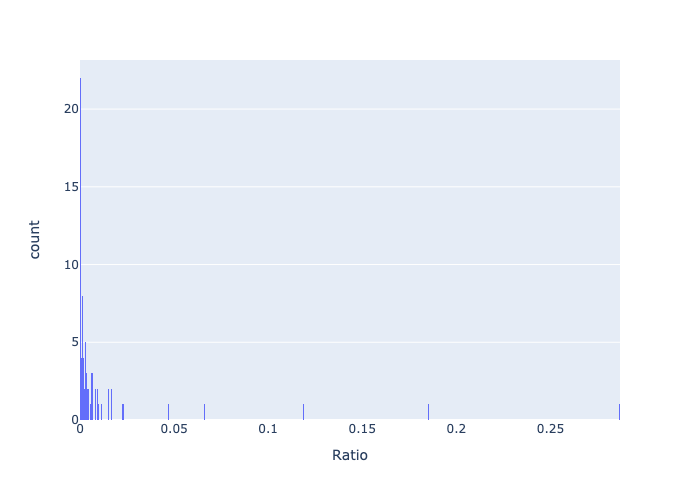

In [7]:
#A visual representation of distribution of cars in the postal code
fig = px.histogram(MakeModel_Counts, x = 'Ratio', nbins=600
)
fig.show("png")

In [8]:
#Identifying Ratio cutoff
MakeModel_Counts.head(16)

,MakeModel,Counts,Ratio
0,TESLA:MODEL 3,779,0.286819
1,TESLA:MODEL Y,503,0.185199
2,NISSAN:LEAF,322,0.118557
3,TESLA:MODEL S,180,0.066274
4,TESLA:MODEL X,129,0.047496
5,CHEVROLET:VOLT,63,0.023196
6,CHEVROLET:BOLT EV,62,0.022828
7,TOYOTA:PRIUS PRIME,45,0.016568
8,BMW:X5,45,0.016568
9,KIA:NIRO,41,0.015096


In [9]:
#Cut off = .9205%(Top 15 Cars)
MakeModel_Counts = MakeModel_Counts[MakeModel_Counts['Ratio'] > .009204] 

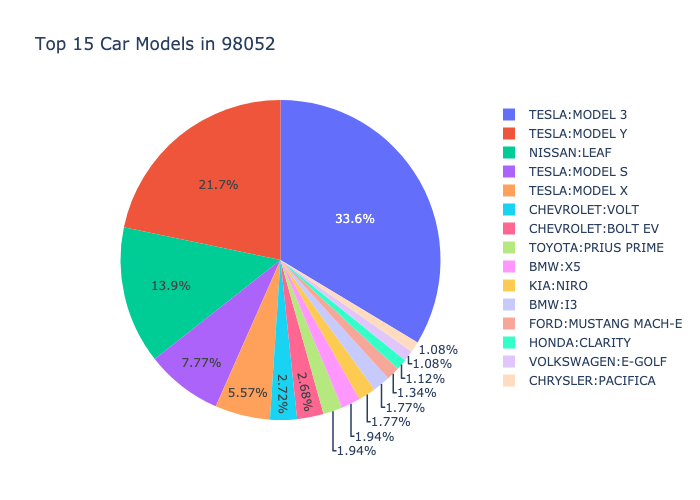

In [10]:
fig = px.pie(MakeModel_Counts, values='Counts', names='MakeModel',title='Top 15 Car Models in 98052')
fig.show("png")

# Sankey Distribution of top 3 Car Brands in WA State

In [11]:
#To make a Sankey Distribution, I need to identify 2 nodes: Source and Target. Source = 'Make', Target = 'Model'. 
top3Cars = df.groupby(['Make','Model'])['Postal_Code'].count().reset_index()
top3Cars = top3Cars[(top3Cars['Make'] == 'TESLA') | (top3Cars['Make'] == 'NISSAN') | (top3Cars['Make'] == 'CHEVROLET')]
top3Cars.columns = ['source','target','value']
unique_source_target = list(pd.unique(top3Cars[['source','target']].values.ravel('k')))


In [12]:
#creates a mapping dictionary each of source and target
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
top3Cars['source'] = top3Cars['source'].map(mapping_dict)
top3Cars['target'] = top3Cars['target'].map(mapping_dict)
links_dict = top3Cars.to_dict(orient='list')

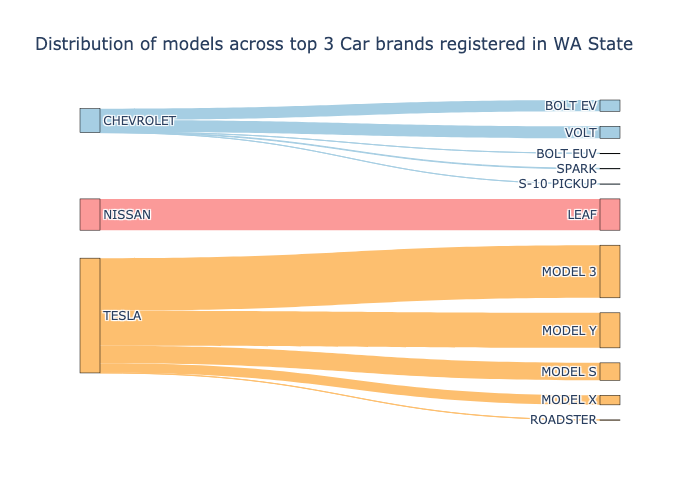

In [13]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label = unique_source_target,
        color = ['#a6cee3','#fb9a99','#fdbf6f','#a6cee3','#a6cee3','#a6cee3','#a6cee3','#a6cee3','#fb9a99',
                 '#fdbf6f','#fdbf6f','#fdbf6f','#fdbf6f','#fdbf6f','#fdbf6f','#fdbf6f','#fdbf6f','#fdbf6f',
                 '#fdbf6f','#fdbf6f']
    ),
    link = dict(
        source= links_dict['source'],
        target = links_dict['target'],
        value = links_dict['value'],
        color = ['#a6cee3','#a6cee3','#a6cee3','#a6cee3','#a6cee3','#fb9a99','#fdbf6f',
                 '#fdbf6f','#fdbf6f','#fdbf6f','#fdbf6f']
    
    )
    
)
])
fig.update_layout(title='Distribution of models across top 3 Car brands registered in WA State')
fig.show("png")